### Function transformers are the type of feature transformation technique that uses a particular function to transform the data to the normal distribution.
### we can also change the pattern of the data using function transformers.
### we can apply function transformer without removing outliers from the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for transformer
from sklearn.preprocessing import FunctionTransformer

In [6]:
d_set=sns.load_dataset('titanic')

# describe the data
d_set.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\mmm\AppData\Local\Temp\ipykernel_8832\2720984581.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_set['fare'])


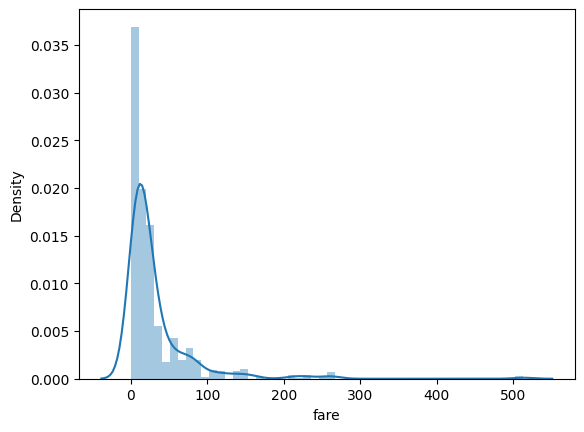

In [8]:
# in the above dataset the fare column contains the outliers and we will make use of tit for the function transformers

# firstly we will visualise the fare column without applying any transformer
sns.distplot(d_set['fare'])
plt.show()


# Log transformer
### on the above column we will apply log1p transformer to make it normalized distributed

In [12]:
# applying transformer
# here any function can be used according to the nature of the data
ft=FunctionTransformer(func=np.log1p) # we have made use of 1 because our data starts with moslty 0 and log0 doesn't perform well
# therefore, 1 is added to avoid dealing with 0

# fit the data
ft.fit(d_set[['fare']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [13]:
# now transform the data
d_set['fare_tf']=ft.transform(d_set[['fare']])
d_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_tf
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.110213
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4.280593
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.188856
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.990834
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2.639057
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,3.433987
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3.196630
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,3.433987


C:\Users\mmm\AppData\Local\Temp\ipykernel_8832\109163382.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_set['fare'])
C:\Users\mmm\AppData\Local\Temp\ipykernel_8832\109163382.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_set['fare_tf'])


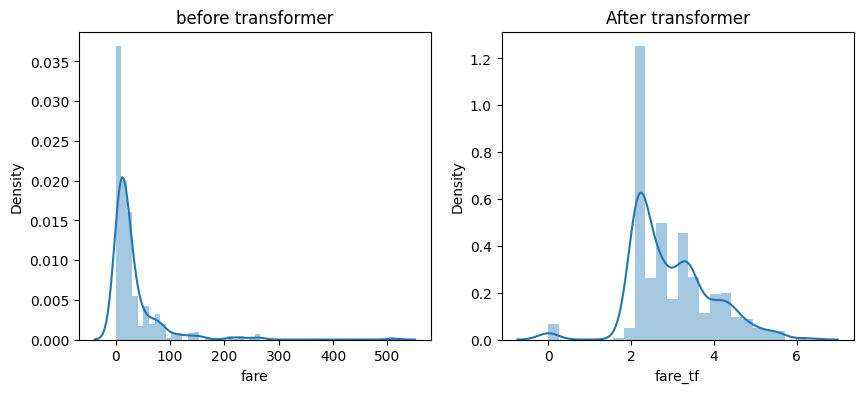

In [18]:
# now visulaising both fare columns
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.distplot(d_set['fare'])
plt.title("before transformer")

plt.subplot(1,2,2)
sns.distplot(d_set['fare_tf'])
plt.title("After transformer")

plt.show()

# Result:
### From above two graphs it is clear that the graph after function transformer is well normally distributed as compared to before. 